In [1]:
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy
from scipy.stats import skewnorm, ttest_ind
import pandas as pd

In [3]:
mu_0 = 0.3
sigma = mu_0*(1-mu_0)

\begin{equation*}
d = \frac{|{\mu_{0}-\mu}|}{\sigma}
\end{equation*}

In [9]:
d = 0.1/sigma

In [11]:
round(d,2)

0.48

In [3]:
# Creating two normally distributed arrays for Target and Control Groups
tg_size = 50
cg_size = 50

np.random.seed(13)

tg = np.random.normal(loc=37, scale=3, size=tg_size)
cg = np.random.normal(loc=36.5, scale=3, size=cg_size)

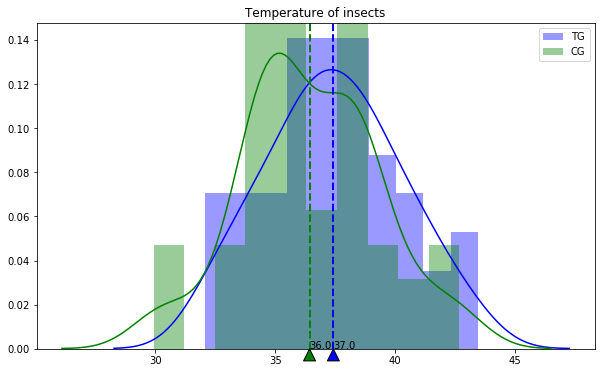

In [4]:
# Calculating mean values for Target and Control Groups
tg_mean = np.mean(tg)
cg_mean = np.mean(cg)

# Creating Distributions plot for our arrays
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(tg, bins=10, ax=ax, label='TG', color='b')
sns.distplot(cg, bins=10, ax=ax, label='CG', color='g')

ax.axvline(linewidth=2, linestyle='--', color='b', x=tg_mean)
ax.axvline(linewidth=2, linestyle='--', color='g', x=cg_mean)

plt.title('Temperature of insects')
plt.legend()

# Adding annotations
ax.annotate(str(round(tg_mean,0)), xy=(tg_mean, 0), xytext=(tg_mean, 0), arrowprops=dict(facecolor='b', shrink=0.05),)
ax.annotate(str(round(cg_mean,0)), xy=(cg_mean, 0), xytext=(cg_mean, 0), arrowprops=dict(facecolor='g', shrink=0.05),)

# Saving plot
fig.savefig('distplot_normal.png')

plt.show()

In [5]:
round(tg_mean,0), round(cg_mean,0)

(37.0, 36.0)

In [7]:
np.std(cg)

2.7875406942501542

### Student test

In [30]:
from scipy.stats import ttest_ind
ttest_ind(tg,cg)

Ttest_indResult(statistic=1.7619330756205609, pvalue=0.08119890809752231)

### Mann-Whitney test

In [31]:
from scipy.stats import mannwhitneyu

mannwhitneyu(tg, cg)

MannwhitneyuResult(statistic=1007.0, pvalue=0.04728668486172901)

### T test and MW 

In [11]:
def get_results(size=50):
    
    tg_size = size
    cg_size = size
    
    tg = np.random.normal(loc=37, scale=3, size=tg_size)
    cg = np.random.normal(loc=36.5, scale=3, size=cg_size)
    
    t_test = ttest_ind(tg,cg)
    mw_test = mannwhitneyu(tg, cg)
    
    return t_test.pvalue, mw_test.pvalue

In [13]:
t_test_res = []
mw_test_res = []

test_results = pd.DataFrame(columns=['t_test', 'mw_test'])

for i in range(10000):
    
    rr = get_results()
    test_results.loc[test_results.shape[0]] = [rr[0], rr[1]]

In [33]:
test_results.head(3)

,t_test,mw_test
0,0.619252,0.449258
1,0.229163,0.068690
2,0.021894,0.017302


In [27]:
crit = 0.01
discr = test_results[((test_results['t_test']<crit)|(test_results['mw_test']<crit))
            &((test_results['t_test']>crit)|(test_results['mw_test']>crit))].shape[0]

In [29]:
discr

262

In [28]:
discr/10000*100

2.62

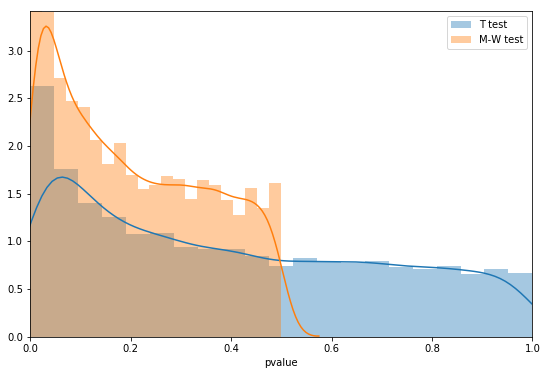

In [17]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(test_results['t_test'], label='T test', ax=ax)
sns.distplot(test_results['mw_test'], label='M-W test', ax=ax)

plt.xlabel('pvalue')
# plt.label('T-test and M-W test comparison')
plt.legend()
plt.xlim((0, 1))
fig.savefig('tests_comparison.png')

plt.show()

### Formulas

\begin{equation*}
T = \frac{\mu_{tg} - \mu_{cg}}{\sqrt{\frac{s_{tg}}{n_{tg}}+\frac{s_{cg}}{n_{cg}}}}
\end{equation*}

\begin{equation*}
T = \frac{\mu_{tg} - \mu_{cg}}{\sqrt{\frac{s_{tg}+s_{cg}}{n}}} = \frac{(\mu_{tg} - \mu_{cg})*\sqrt{n}}{\sqrt{s_{tg}+s_{cg}}}
\end{equation*}